In [1]:
import datetime
import os
import os.path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import MO, TU, TH, FR, SA
import numpy as np
import pandas as pd

- [ ] separate figures for every weekday

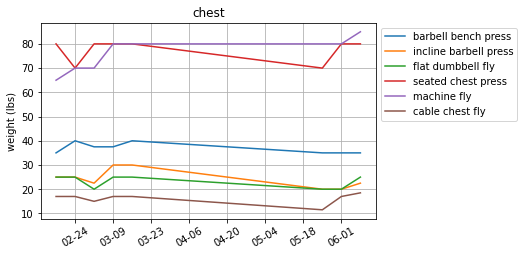

In [2]:
def show_in_single_figure(file, byweekday):
    locator = mdates.WeekdayLocator(byweekday, interval=2)
    formatter = mdates.DateFormatter('%m-%d')
    
    # clean the data
    data = pd.read_csv(os.path.join('data', file), index_col=0,
                       dtype=np.float32, parse_dates=True)
    ax = data.plot()
    
    # change the look
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1, 1))
    title = file[:file.index('.')]
    ax.set_title(title)
    ax.get_xaxis().set_major_locator(locator)
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_ylabel('weight (lbs)')
    plt.gcf().autofmt_xdate(ha='center')
    
    # save and show the figure
#     plt.savefig(os.path.join('figures', title), bbox_inches='tight')
    plt.show()

show_in_single_figure('chest.csv', MO)

In [20]:
def subplots_broken(data, byweekday):
    # create the axes based on the density of data
    start = list(data.index.month).index(5)
    start_ratio = start / len(data.index)
    gridspec_kw = dict(width_ratios=[start_ratio, 1 - start_ratio], wspace=0.05)
    fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, gridspec_kw=gridspec_kw)

    #adjust the axes so that they are broken
    delta = datetime.timedelta(days=2)
    ax0.set_xlim(data.index[0], data.index[start - 1] + delta)
    ax1.set_xlim(data.index[start] - delta, data.index[-1])

    # add broken symbols
    fontdict = dict(fontsize=15, fontweight='normal', rotation=-10, ha='center', va='center')
    fig.text(1, 1, '/', fontdict=fontdict, transform=ax0.transAxes)
    fig.text(1, 0, '/', fontdict=fontdict, transform=ax0.transAxes)
    fig.text(0, 1, '/', fontdict=fontdict, transform=ax1.transAxes)
    fig.text(0, 0, '/', fontdict=fontdict, transform=ax1.transAxes)

    # hide spines
    ax0.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # set the locators and formatters
    formatter = mdates.DateFormatter('%m-%d')

    locator = mdates.WeekdayLocator(byweekday=byweekday)
    ax0.get_xaxis().set_major_locator(locator)
    ax0.get_xaxis().set_major_formatter(formatter)

    locator = mdates.WeekdayLocator(byweekday=byweekday)
    ax1.get_xaxis().set_major_locator(locator)
    ax1.get_xaxis().set_major_formatter(formatter)

    # add texts
    ax0.set_ylabel('weight (lbs)')
    ax1.yaxis.tick_right()
    return fig, ax0, ax1

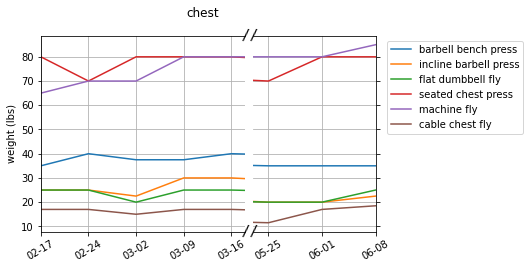

In [21]:
def show_in_single_figure_broken(file, byweekday):
    data = pd.read_csv(os.path.join('data', file), index_col=0,
                   dtype=np.float32, parse_dates=True)
    fig, ax0, ax1 = subplots_broken(data, byweekday)

    # plot the data
    data.plot(ax=ax0, legend=False)
    data.plot(ax=ax1)

    # more adjustments
    ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    fig.autofmt_xdate(ha='center')
    fig.suptitle(file[:file.find('.')])
    ax0.grid(True)
    ax1.grid(True)
    
    # save and show the figure
    plt.savefig(os.path.join('figures', file[:file.index('.')]), bbox_inches='tight')
    plt.show()

show_in_single_figure_broken('chest.csv', MO)

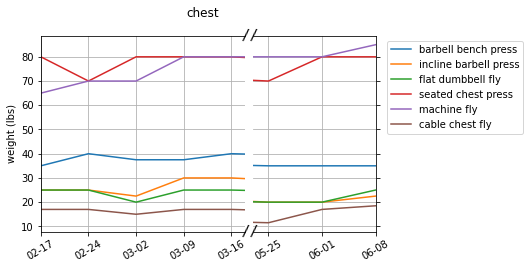

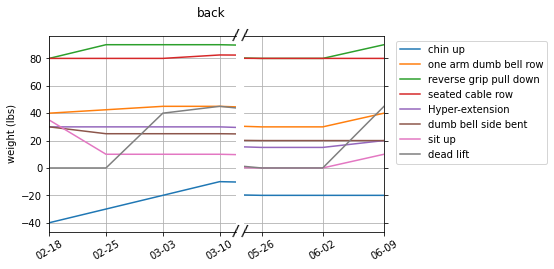

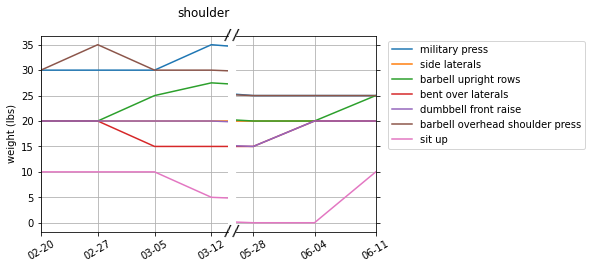

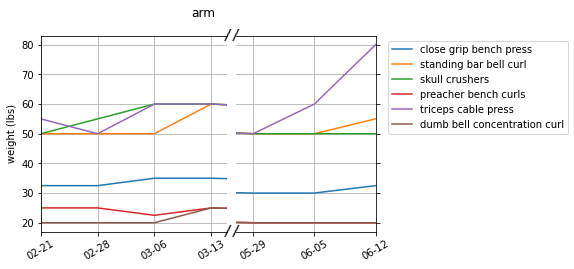

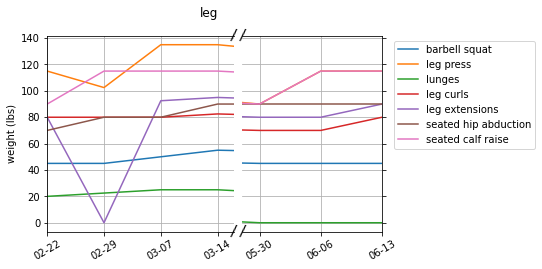

In [5]:
files = ['chest.csv', 'back.csv', 'shoulder.csv', 'arm.csv', 'leg.csv']
weekdays = [MO, TU, TH, FR, SA]
for file, byweekday in zip(files, weekdays):
    show_in_single_figure_broken(file, byweekday)

In [10]:
data = pd.read_csv(os.path.join('data', 'chest.csv'), index_col=0,
               dtype=np.float32, parse_dates=True)
data

,barbell bench press,incline barbell press,flat dumbbell fly,seated chest press,machine fly,cable chest fly
2020-02-17,35.0,25.0,25.0,80.0,65.0,17.0
2020-02-24,40.0,25.0,25.0,70.0,70.0,17.0
2020-03-02,37.5,22.5,20.0,80.0,70.0,15.0
2020-03-09,37.5,30.0,25.0,80.0,80.0,17.0
2020-03-16,40.0,30.0,25.0,80.0,80.0,17.0
2020-05-25,35.0,20.0,20.0,70.0,80.0,11.5
2020-06-01,35.0,20.0,20.0,80.0,80.0,17.0
2020-06-08,35.0,22.5,25.0,80.0,85.0,18.5


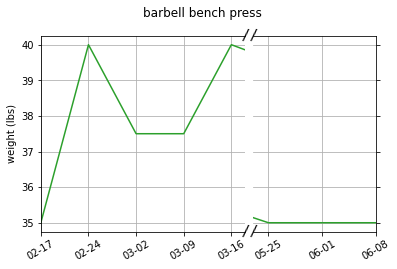

In [17]:
fig, ax0, ax1 = subplots_broken(data, MO)

move = 'barbell bench press'
color = 'tab:green'
data[move].plot(ax=ax0, color=color)
data[move].plot(ax=ax1, color=color)

fig.autofmt_xdate(ha='center')
fig.suptitle(move)
ax0.grid(True)
ax1.grid(True)